<a href="https://colab.research.google.com/github/Mukish45/Coconut-Grade-Classification/blob/main/_Coconut_Grade_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import os
import zipfile

import datetime
import shutil

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
len(os.listdir('/content/drive/MyDrive/coconut dataset/grade1'))

0

In [ ]:
dir_1 = '/content/drive/MyDrive/coconut dataset/grade1'
dir_2 = '/content/drive/MyDrive/coconut dataset/train/grade1'

dir1_lst = os.listdir(dir_1)
dir1_lst.sort()

for img in dir1_lst[:800]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_2, img))

dir_3 = '/content/drive/MyDrive/coconut dataset/valid/grade1'

for img in dir1_lst[800:]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_3, img))

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/coconut dataset/train/grade1')))
print(len(os.listdir('/content/drive/MyDrive/coconut dataset/valid/grade1')))

800
200


In [ ]:
print(len(os.listdir('/content/drive/MyDrive/coconut dataset/grade1')))

0


In [ ]:
!zip -r -q grade1_train.zip '/content/train/grade1'


zip error: Nothing to do! (try: zip -r -q grade1_train.zip . -i /content/train/grade1)


In [ ]:
!zip -r -q grade1_valid.zip '/content/drive/MyDrive/coconut dataset/grade1'

In [ ]:
dir_1 = '/content/drive/MyDrive/coconut dataset/grade1'

dir1_lst = os.listdir(dir_1)

dir_3 = '/content/validation/grade1'

for img in dir1_lst[800:]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_3, img))

In [ ]:
dir_1 = '/content/drive/MyDrive/coconut dataset/train/grade3'
dir_2 = '/content/drive/MyDrive/coconut dataset/valid/grade3'

dir1_lst = os.listdir(dir_1)
dir1_lst.sort()

for img in dir1_lst[701:]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_2, img))
'''
dir_3 = '/content/drive/MyDrive/coconut dataset/valid/grade3'

for img in dir1_lst[800:]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_3, img))
'''

"\ndir_3 = '/content/drive/MyDrive/coconut dataset/valid/grade3'\n\nfor img in dir1_lst[800:]:\n  shutil.move(os.path.join(dir_1, img), os.path.join(dir_3, img))\n"

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/coconut dataset/train/grade3')))
print(len(os.listdir('/content/drive/MyDrive/coconut dataset/valid/grade3')))

701
131


In [ ]:
!zip -r -q grade2_train.zip '/content/train/grade2'


zip error: Nothing to do! (try: zip -r -q grade2_train.zip . -i /content/train/grade2)


In [ ]:
!zip -r -q grade2_valid.zip '/content/validation/grade2'


zip error: Nothing to do! (try: zip -r -q grade2_valid.zip . -i /content/validation/grade2)


In [ ]:
len(os.listdir('/content/drive/MyDrive/coconut dataset/grade3'))

0

In [ ]:
dir_1 = '/content/drive/MyDrive/coconut dataset/grade3'
dir_2 = '/content/drive/MyDrive/coconut dataset/train/grade3'

dir1_lst = os.listdir(dir_1)
dir1_lst.sort()

for img in dir1_lst[:700]:
  shutil.move(os.path.join(dir_2, img), os.path.join(dir_1, img))

dir_3 = '/content/drive/MyDrive/coconut dataset/valid/grade3'

for img in dir1_lst[700:]:
  shutil.move(os.path.join(dir_3, img), os.path.join(dir_1, img))

In [ ]:
print(len(os.listdir('/content/train/grade3')))
print(len(os.listdir('/content/validation/grade3')))

In [ ]:
len(os.listdir('/content/drive/MyDrive/coconut dataset/grade3'))

In [ ]:
import os
import shutil

source = '/content/content/drive/MyDrive/coconut dataset/grade1'
destination = '/content/content/validation/grade1'

allfiles = os.listdir(source)

for f in allfiles:
	src_path = os.path.join(source, f)
	dst_path = os.path.join(destination, f)
	shutil.move(src_path, dst_path)


In [ ]:
source = '/content/'
destination = '/content/drive/MyDrive/coconut dataset/'

f = 'grade3_valid.zip'

#for f in allfiles:
src_path = os.path.join(source, f)
dst_path = os.path.join(destination, f)
shutil.move(src_path, dst_path)

In [ ]:
!zip -r -q grade3_train.zip '/content/train/grade3'

In [ ]:
!zip -r -q grade3_valid.zip '/content/validation/grade3'

In [ ]:
local_zip = '/content/drive/MyDrive/coconut dataset/grade1_valid.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

In [ ]:
len(os.listdir('/content/content/validation/grade3'))

**Continue from here**

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)

train_gen = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/coconut dataset/train',
    target_size = (256,256),
    batch_size = 128,
    class_mode = 'categorical'
)

val_gen = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/coconut dataset/valid',
    target_size = (256,256),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 2301 images belonging to 3 classes.
Found 531 images belonging to 3 classes.


In [ ]:
model = Sequential()
model.add(layers.Conv2D(input_shape=(256, 256, 3), filters=64,kernel_size=(3,3), padding="same",activation='relu'))
model.add(layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv1'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))
model.add(layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv2'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv1'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv4'))


model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                        

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=5)

In [ ]:
model_fit = model.fit(train_gen,
                      epochs = 20,
                      verbose = 1,
                      validation_data = val_gen,
                      callbacks = early_stopping)

Epoch 1/20
18/18 [==============================] - 693s 39s/step - loss: 1.0938 - accuracy: 0.3581 - val_loss: 1.0901 - val_accuracy: 0.4407
Epoch 2/20
18/18 [==============================] - 520s 29s/step - loss: 1.0551 - accuracy: 0.4724 - val_loss: 1.1628 - val_accuracy: 0.3107
Epoch 3/20
18/18 [==============================] - 517s 29s/step - loss: 0.8767 - accuracy: 0.6497 - val_loss: 1.0393 - val_accuracy: 0.5669
Epoch 4/20
18/18 [==============================] - 518s 29s/step - loss: 0.6897 - accuracy: 0.7140 - val_loss: 0.6053 - val_accuracy: 0.7439
Epoch 5/20
18/18 [==============================] - 512s 29s/step - loss: 0.5402 - accuracy: 0.7775 - val_loss: 0.6810 - val_accuracy: 0.6591
Epoch 6/20
18/18 [==============================] - 514s 29s/step - loss: 0.5010 - accuracy: 0.7914 - val_loss: 0.5433 - val_accuracy: 0.7928
Epoch 7/20
18/18 [==============================] - 512s 29s/step - loss: 0.4546 - accuracy: 0.8205 - val_loss: 0.5585 - val_accuracy: 0.7834
Epoch 

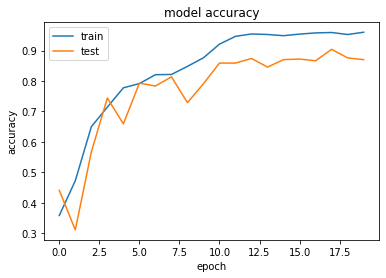

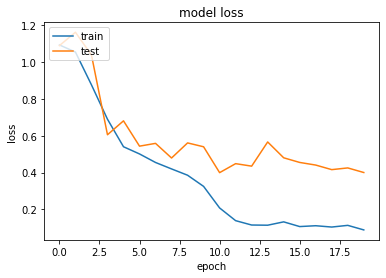

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('mymodel.h5')

In [ ]:
model2 = Sequential()
model2.add(layers.Conv2D(input_shape=(256, 256, 3), filters=64,kernel_size=(3,3), padding="same",activation='relu'))
model2.add(layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv1'))
model2.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))
model2.add(layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv2'))
model2.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model2.add(layers.Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv1'))
model2.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model2.add(layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv4'))
model2.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model2.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))


In [ ]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(3,activation='softmax'))

In [ ]:
model2.summary()

In [ ]:
from sklearn.metrics import f1_score
def my_metric_fn(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    return f1

model2.compile(loss = 'categorical_crossentropy',
             optimizer = 'Adagrad',
             metrics = [my_metric_fn])

In [ ]:
model_fit2 = model2.fit(train_gen,
                      epochs = 20,
                      verbose = 1,
                      validation_data = val_gen,
                      callbacks = early_stopping)

In [ ]:
plt.plot(model_fit2.history['accuracy'])
plt.plot(model_fit2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit2.history['loss'])
plt.plot(model_fit2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()